Ajustar el modelo a un Random Forest

Extraer las métricas

Debatid entre vosotras que modelo es mejor y por qué (basándose en las métricas)

In [1]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Barra de progreso de un proceso
# ------------------------------------------------------------------------------
from tqdm import tqdm

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

In [2]:
# from google.colab import files 


# # uploaded = files.upload() 

In [3]:
# import pandas as pd 
# import io 

# df = pd.read_csv(io.BytesIO(uploaded['possum_completo.csv']), index_col = 0) 
# df.head() 

In [4]:
df = pd.read_csv("Datos/possum_completo.csv", index_col =0)
df

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,...,x0_other,sex_f,sex_m,site_1,site_2,site_3,site_4,site_5,site_6,site_7
0,2.218955,94.1,1.134883,0.445603,-0.517732,1.231614,1.557431,0.147177,0.491222,1.241874,...,0.0,0,1,1,0,0,0,0,0,0
1,1.157937,92.5,0.231197,1.028384,-0.261331,0.810757,0.750501,0.912499,0.736833,0.150424,...,0.0,1,0,1,0,0,0,0,0,0
2,1.157937,94.0,1.005785,1.960834,1.020671,1.421000,0.921668,0.434173,1.473667,0.514241,...,0.0,1,0,1,0,0,0,0,0,0
3,1.157937,93.2,0.069825,1.144941,0.507870,1.568300,0.995025,0.147177,0.491222,0.514241,...,0.0,1,0,1,0,0,0,0,0,0
4,-0.964098,91.5,-0.188371,-0.370290,-0.517732,0.495114,1.239549,0.051512,0.736833,0.150424,...,0.0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,-1.494606,89.5,-0.285195,-1.302740,-0.261331,-0.557029,-0.325405,-0.235484,-1.964889,-2.032475,...,1.0,0,1,0,0,0,0,0,0,1
100,-1.494606,88.6,-0.704763,-1.069627,1.020671,-0.893715,-0.031976,-1.000805,-0.982445,0.150424,...,1.0,0,1,0,0,0,0,0,0,1
101,1.157937,92.4,-0.607940,0.445603,0.507870,-1.083100,-0.667739,-1.957457,-0.982445,-0.941025,...,1.0,1,0,0,0,0,0,0,0,1
102,0.096920,91.5,-0.543391,-1.069627,-0.261331,-1.209358,-0.545477,0.338508,-0.982445,-1.304842,...,1.0,0,1,0,0,0,0,0,0,1


In [5]:
X = df.drop(["hdlngth"],  axis = 1)
y = df["hdlngth"]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
# recordamos que lo primero que hacíamos era crear un diccionario con los hiperparámetros que queríamos probar

param = {"max_depth": [2,4, 6], # teniendo en cuenta que teníamos overfitting tendremos que reducir la profundidad del modelo, la nuestra anterior era de 17. Bajaremos mucho este valor ya que teníamos un overfitting muy claro
        "max_features": [1,2,3,4],# calculamos en celdas anteriores, probaremos a hacer el modelo como una variable, 2, 3 y 4. Ponemos como límite el 4 ya que es el resultado de la raiz cuadrada. 
        # estos dos hiperparámetros son más difíciles de definir, pero usualmente se suelen elegir los siguientes valores
        "min_samples_split": [5,15,50],
        "min_samples_leaf": [10,25,50]} 

In [8]:
gs_rf = GridSearchCV(
            estimator=RandomForestRegressor(), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            verbose=-1, # para que no nos printee ningún mensaje en pantalla
            return_train_score = True, # para que nos devuelva el valor de las métricas de set de datos de entrenamiento
            scoring="neg_mean_squared_error") # la métrica que queremos que nos devuelva

In [9]:
# ajustamos el modelo que acabamos de definir en el GridSearch
# 🚨 Esta celda puede tardar en ejecutarse

gs_rf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 6], 'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 25, 50],
                         'min_samples_split': [5, 15, 50]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [10]:
# al igual que el decision tree podemos sacar cual es nuestro mejor bosque
# En este caso,  nuestro mejor bosque es aquel que esta formado por arboles de 6 de profundidad, usa 4 variables y que tiene  un min_samples_leaf y un min_samples_split de 10. 

bosque = gs_rf.best_estimator_
bosque

RandomForestRegressor(max_depth=4, max_features=4, min_samples_leaf=10,
                      min_samples_split=15)

In [11]:
# # dibujemos los árboles de nuestro bosque


# for arbol in tqdm(bosque.estimators_):
#     fig = plt.figure(figsize=(40, 20))
#     tree.plot_tree(arbol, feature_names= x_train.columns, filled = True)
#     plt.show()

Vamos a calcular sus métricas para ver como de bueno es nuestro modelo prediciendo:

In [12]:
y_pred_test_rf = bosque.predict(x_test)
y_pred_train_rf = bosque.predict(x_train)

In [13]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_train, y_train_pred)],
                'MSE': [mean_squared_error(y_test, y_test_pred), mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_test_pred)), np.sqrt(mean_squared_error(y_train, y_train_pred))],
                'R2':  [r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [15]:

# vamos a crearnos un dataframe, igual que hicimos en la clase anterior con la importancia de cada una de las variables incluidas en el modelo

importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': bosque.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
1,skullw,0.262617
2,totlngth,0.207596
7,chest,0.126609
8,belly,0.111956
4,footlgth,0.102983
6,eye,0.066667
3,taill,0.035617
0,age,0.024152
5,earconch,0.021791
13,site_1,0.016688


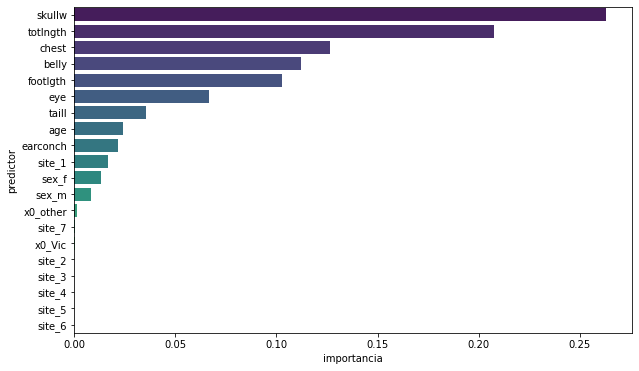

In [16]:
# por último ploteamos los resultados para verlo de una forma más amigable. 

plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");
plt.show()

In [17]:
# sacamos las métricas para ver si hay overfitting o underfitting, para modificar la profundidad en función de estos resultados

results_rf = metricas(y_test, y_train, y_pred_test_rf, y_pred_train_rf, "Random Forest")
results_rf

,MAE,MSE,RMSE,R2,set,modelo
0,1.624309,4.447096,2.108814,0.416166,test,Random Forest
1,1.715385,5.619450,2.370538,0.594873,train,Random Forest


In [18]:
df_results_rl = pd.read_csv("./Datos/resultados_rl.csv", index_col=0)
df_results_rl

,MAE,MSE,RMSE,R2,set,modelo
0,1.730531,4.959695,2.227037,0.573966,test,Regresión lineal
1,2.002134,6.874220,2.621873,0.473920,train,Regresión lineal


In [19]:
df_results_dt = pd.read_csv("./Datos/resultados_dt.csv", index_col=0)
df_results_dt

,MAE,MSE,RMSE,R2,set,modelo
0,2.435241,9.068721,3.011432,0.221004,test,Decision tree II
1,2.176951,8.224393,2.867820,0.370592,train,Decision tree II


Los errores en el random forest han salido más pequeños, sin embargo, el R2 es más bajo en el test.

El la regresión lineal, el R2 sale mejor, pero los errores son un poquito más altos. Al ser el modelo más sencillo e interpretable, podría llegar a compensar quedarse con la regresión lineal.

El peor es el decision tree. De hecho, escoge la variable chest como principal, cuando totlength o skullw son más significativas.

En cualquier caso, nuestra muestra es muy pequeña y hay mucha variación entre test y train, que podría ser debido al muestreo.